In [67]:
import os
import numpy as np
import matplotlib.pyplot as plt
import utils

data_path = '../data/gaussian.csv'
log_path = '../results/'

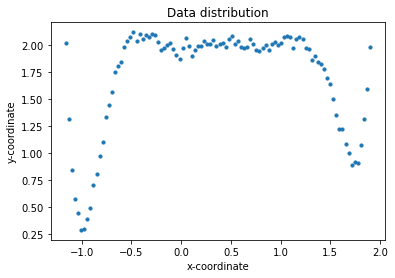

In [68]:
# Data Visualisation
f = open(data_path, 'r')
input_x, target = [], []
for line in f.readlines():
    nums = line.strip().split(',')
    input_x.append(float(nums[0]))
    target.append(float(nums[1]))
f.close()
plt.scatter(input_x, target, s=10)
plt.title('Data distribution')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

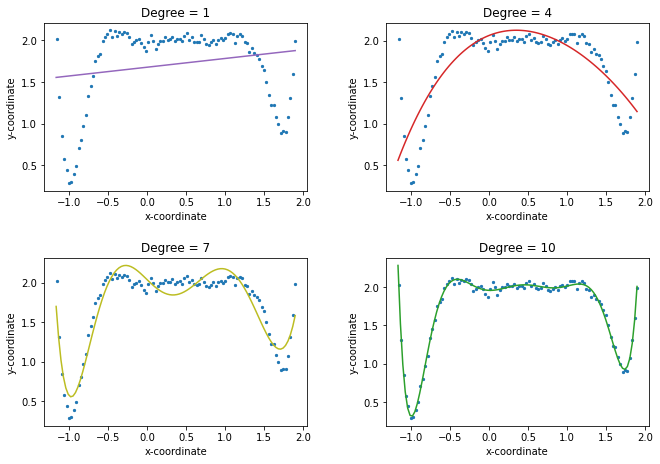

In [69]:
# Plots of Polynomials of different degree
deg_file = 'polynomial_deg.txt'
f = open(os.path.join(log_path, deg_file), 'r')
x, y = np.linspace(-1.17, 1.9, 100), []

for line in f.readlines():
    tokens = line.strip().split()
    y_out = utils.get_output_from_weights(x, tokens[3])
    y.append(y_out)
f.close()

fig, axs = plt.subplots(2, 2)
deg_list = [1, 4, 7, 10]
colors = ['tab:purple', 'tab:red', 'tab:olive', 'tab:green']
    
for (ax, deg, col) in zip(axs.flat, deg_list, colors):
    ax.plot(x, y[deg],col)
    ax.scatter(input_x, target, s=5)
    ax.set(xlabel='x-coordinate', ylabel='y-coordinate')
    ax.set_title(f'Degree = {deg}')

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1.4, wspace=0.3, hspace=0.4)
plt.show()

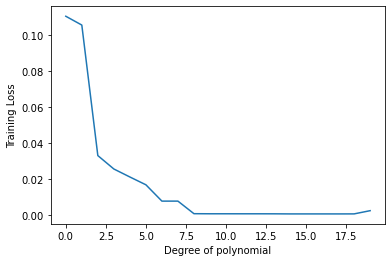

In [85]:
# Plot of Loss v/s Degree of polynomial
deg_loss_file = 'polynomial_deg_loss.txt'
f = open(os.path.join(log_path, deg_loss_file), 'r')

train_loss, test_loss = [], []

for line in f.readlines():
    tokens = line.strip().split()
    train_loss.append(float(tokens[4]))
    test_loss.append(float(tokens[7]))
f.close()    

plt.plot(train_loss)
plt.ylabel('Training Loss')
plt.xlabel('Degree of polynomial')
plt.show()

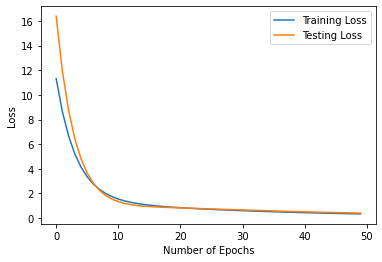

In [86]:
# Plots for Loss v/s epochs for Gradient Descent
grad_file = 'grad_descent_loss.txt'
f = open(os.path.join(log_path, grad_file), 'r')

train_loss, test_loss = [], []

for line in f.readlines():
    tokens = line.strip().split()
    train_loss.append(float(tokens[4]))
    test_loss.append(float(tokens[8]))
f.close()
        
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.show()

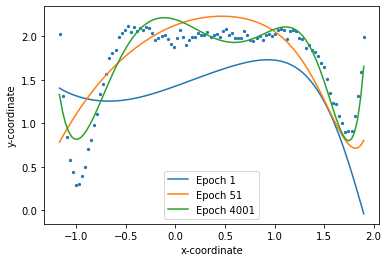

In [89]:
# Plots of Polynomials at various epochs
grad_file = 'grad_descent_wts.txt'
f = open(os.path.join(log_path, grad_file), 'r')

x, y = np.linspace(-1.17, 1.9, 100), []

lines = f.readlines()
lines = [lines[0], lines[50], lines[4000]]
for line in lines:
    tokens = line.strip().split()
    y_out = utils.get_output_from_weights(x, tokens[3])
    y.append(y_out)
f.close()

# Plot graphs for epoch 1, 51, 4001
epochs = [1, 51, 4001]
plt.scatter(input_x, target, s=5)
for (epoch, y_out) in zip(epochs, y):
    plt.plot(x,y_out, label=f'Epoch {epoch}')
plt.legend()
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

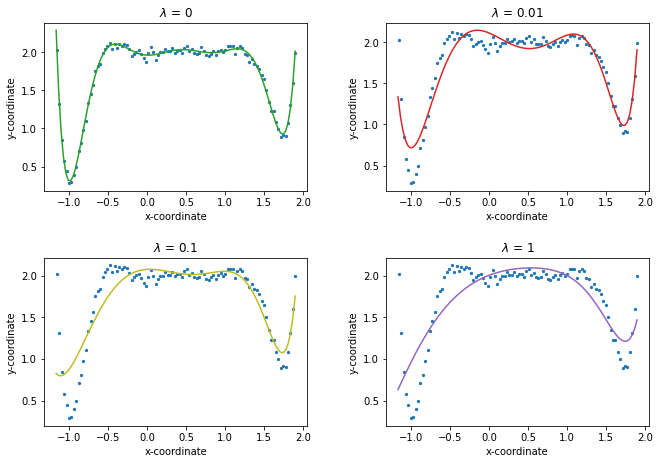

In [76]:
# Plots of Polynomials obtained on different regularization constants
lambda_file = 'lambda.txt'
f = open(os.path.join(log_path, lambda_file), 'r')
x, y = np.linspace(-1.17, 1.9, 100), []

for line in f.readlines():
    tokens = line.strip().split()
    y_out = utils.get_output_from_weights(x, line.strip().split()[3])
    y.append(y_out)
f.close()
    
fig, axs = plt.subplots(2, 2)
colors = ['tab:green', 'tab:red', 'tab:olive', 'tab:purple']
lamb = [0, 1e-2, 1e-1, 1]
    
for (ax, y_out, l, col) in zip(axs.flat, y, lamb, colors):
    ax.plot(x, y_out, col)
    ax.scatter(input_x, target, s=5)
    ax.set(xlabel='x-coordinate', ylabel='y-coordinate')
    ax.set_title(f'$\lambda$ = {l}')

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1.4, wspace=0.3, hspace=0.4)

plt.show()